(516, 819, 3)

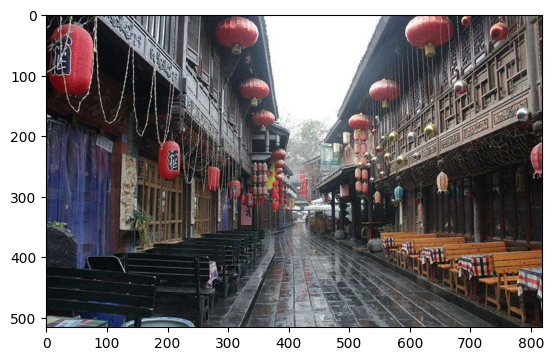

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline

chengdu = mpimg.imread('./challenge-7-chengdu.png') # 将图片加载为 ndarray 数组
plt.imshow(chengdu) # 将数组还原成图像

chengdu.shape

In [3]:
data = chengdu.reshape(516 * 819, 3)

data.shape, data[10]

((422604, 3), array([0.12941177, 0.13333334, 0.14901961], dtype=float32))

In [7]:
"""计算像素点种类个数
"""
def get_variety(data):
    """
    参数:
    预处理后像素点集合

    返回:
    num_variety -- 像素点种类个数
    """
    s = set()
    for pixel in data:
        l = pixel.tolist()
        tup = tuple(l)
        s.add(tup)
    num_variety=len(s)

    # temp=data.tolist()
    # num_variety=len(set([tuple(t) for t in temp]))
    return num_variety

In [8]:
get_variety(data)

100109

In [9]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(10)
# 使用这个数据取训练聚类
model.fit(data)
# 同样的使用原来的数据进行分类
predict = model.predict(data)

new_colors = model.cluster_centers_[predict]

In [10]:
# 调用前面实现计算像素点种类的函数，计算像素点更新后种类的个数
get_variety(new_colors)

10

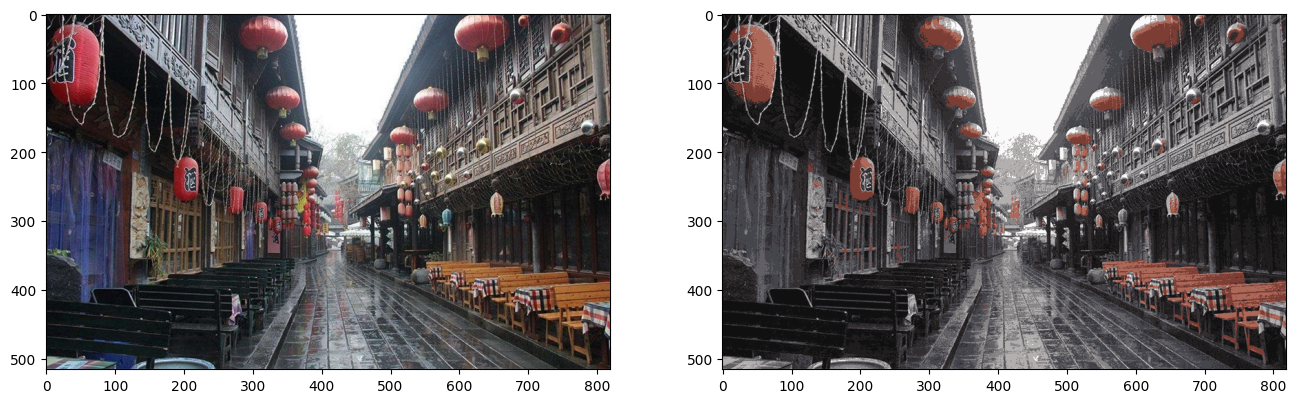

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].imshow(chengdu)
compress = new_colors.reshape(516,819, 3)
# compress = new_colors.reshape(chengdu.shape)
ax[1].imshow(compress)

In [13]:
# 运行对比
mpimg.imsave("new_chengdu.png", compress)
!du -h new_chengdu.png
!du -h challenge-7-chengdu.png

212K	new_chengdu.png
1.1M	challenge-7-chengdu.png
